# OpenEO Connection to R Backend

In [1]:
import openeo
import logging
from openeo.auth.auth_bearer import BearerAuth
logging.basicConfig(level=logging.INFO)

In [2]:
# Define constants

# Connection
R_DRIVER_URL = "https://r-server.openeo.org"
OUTPUT_FILE = "/tmp/openeo_r_output.png"
OUTFORMAT = "png"

# Auth
USER = "test"
PASSWORD = "test"

# Data
PRODUCT_ID = "sentinel2_subset"

DATE_START = "2017-07-21"
DATE_END = "2017-07-28"

IMAGE_WEST = 7.5
IMAGE_EAST = 8.5
IMAGE_NORTH = 52.0
IMAGE_SOUTH = 51.0
IMAGE_SRS = "EPSG:4326"

# Processes
NDVI_RED = "B4"
NDVI_NIR = "B8"

STRECH_COLORS_MIN = -1
STRECH_COLORS_MAX = 1

In [3]:
# Connect with R backend
connection = openeo.connect(R_DRIVER_URL, auth_type=BearerAuth, auth_options={"username": USER, "password": PASSWORD})
connection

In [4]:
# Get available processes from the back end.
processes = connection.list_processes()
processes

[{'description': 'filters a data set with a temporal dimension based on a stated start and end date',
  'min_parameters': 1,
  'name': 'filter_daterange',
  'parameters': {'extent': {'description': 'an Array containing start and stop date/timestamp for the query interval',
    'required': False,
    'schema': {'type': 'temporal-extent'}},
   'imagery': {'description': 'the temporal dataset/collection',
    'required': True,
    'schema': {'format': 'eodata', 'type': 'object'}}},
  'returns': {'description': 'Processed EO data.',
   'schema': {'format': 'eodata', 'type': 'object'}},
  'summary': 'Filter by a date range'},
 {'description': 'calculates the minimum value per pixel of a single valued band collection',
  'min_parameters': 1,
  'name': 'min_time',
  'parameters': {'imagery': {'description': 'the temporal dataset/collection',
    'required': True,
    'schema': {'format': 'eodata', 'type': 'object'}}},
  'returns': {'description': 'Processed EO data.',
   'schema': {'format': 

In [5]:
# Retrieve the list of available collections
collections = connection.list_collections()

list(collections)[:2]

[{'description': 'Sentinel 2 raster time series for a small spatial subset',
  'extent': {'spatial': [22.8994, -19.0099, 22.9282, -18.9825],
   'temporal': ['2016-12-12T08:23:32Z', '2017-08-29T08:16:01Z']},
  'license': 'propietary',
  'links': [{'href': 'https://scihub.copernicus.eu/twiki/pub/SciHubWebPortal/TermsConditions/TC_Sentinel_Data_31072014.pdf',
    'rel': 'license'},
   {'href': 'https://r-server.openeo.org/collections/sentinel2_subset',
    'rel': 'self'}],
  'name': 'sentinel2_subset',
  'title': 'Sentinel-2A MSI L1C subset'},
 {'description': 'Calculated NDVI raster time series for a small spatial subset derived from Landsat-7',
  'extent': {'spatial': [35.7114, 7.1295, 35.8024, 7.2204],
   'temporal': ['2003-08-06T00:00:00Z', '2014-12-26T00:00:00Z']},
  'license': 'propietary',
  'links': [{'href': 'https://landsat.usgs.gov/sites/default/files/documents/Landsat_Data_Policy.pdf',
    'rel': 'license'},
   {'href': 'https://r-server.openeo.org/collections/landsat7_ndvi',


In [6]:
# Get detailed information about a collection
process = connection.describe_collection(PRODUCT_ID)
process

{'description': 'Sentinel 2 raster time series for a small spatial subset',
 'eo:bands': {'B1': {'center_wavelength': 4.439,
   'common_name': 'coastal',
   'offset': 0,
   'resolution': 60,
   'scale': 1},
  'B10': {'center_wavelength': 1.3735,
   'offset': 0,
   'resolution': 60,
   'scale': 1},
  'B11': {'center_wavelength': 1.6137,
   'common_name': 'swir16',
   'offset': 0,
   'resolution': 20,
   'scale': 1},
  'B12': {'center_wavelength': 2.2024,
   'common_name': 'swir22',
   'offset': 0,
   'resolution': 20,
   'scale': 1},
  'B2': {'center_wavelength': 4.966,
   'common_name': 'blue',
   'offset': 0,
   'resolution': 10,
   'scale': 1},
  'B3': {'center_wavelength': 5.6,
   'common_name': 'green',
   'offset': 0,
   'resolution': 10,
   'scale': 1},
  'B4': {'center_wavelength': 6.645,
   'common_name': 'red',
   'offset': 0,
   'resolution': 10,
   'scale': 1},
  'B5': {'center_wavelength': 7.039,
   'offset': 0,
   'resolution': 20,
   'scale': 1},
  'B6': {'center_waveleng

In [7]:
# Select collection product
datacube = connection.imagecollection(PRODUCT_ID)

print(datacube.to_json())

{'name': 'sentinel2_subset', 'process_id': 'get_collection'}

In [8]:
# Specifying the date range and the bounding box
datacube = datacube.filter_bbox(west=IMAGE_WEST, east=IMAGE_EAST, north=IMAGE_NORTH,
                                             south=IMAGE_SOUTH, crs=IMAGE_SRS)
datacube = datacube.filter_daterange(extent=[DATE_START, DATE_END])

print(datacube.to_json())

{'extent': ['2017-07-21', '2017-07-28'],
 'imagery': {'extent': {'crs': 'EPSG:4326',
   'east': 8.5,
   'north': 52.0,
   'south': 51.0,
   'west': 7.5},
  'imagery': {'name': 'sentinel2_subset', 'process_id': 'get_collection'},
  'process_id': 'filter_bbox'},
 'process_id': 'filter_daterange'}

In [9]:
# Applying some operations on the data
datacube = datacube.ndvi(red=NDVI_RED, nir=NDVI_NIR)
datacube = datacube.min_time()

print(datacube.to_json())

{'imagery': {'imagery': {'extent': ['2017-07-21', '2017-07-28'],
   'imagery': {'extent': {'crs': 'EPSG:4326',
     'east': 8.5,
     'north': 52.0,
     'south': 51.0,
     'west': 7.5},
    'imagery': {'name': 'sentinel2_subset', 'process_id': 'get_collection'},
    'process_id': 'filter_bbox'},
   'process_id': 'filter_daterange'},
  'nir': 'B8',
  'process_id': 'NDVI',
  'red': 'B4'},
 'process_id': 'min_time'}

In [10]:
# Sending the job to the backend
job = datacube.create_job()
job.start_job()
job

In [11]:
# Describe Job
job.describe_job()

{'budget': None,
 'costs': 0,
 'description': None,
 'job_id': '9P5eXrzcOBXCfdK',
 'output': {'format': {}, 'parameters': {}},
 'plan': None,
 'process_graph': {'imagery': {'imagery': {'extent': ['2017-07-21',
     '2017-07-28'],
    'imagery': {'extent': {'crs': 'EPSG:4326',
      'east': 8.5,
      'north': 52,
      'south': 51,
      'west': 7.5},
     'imagery': {'name': 'sentinel2_subset', 'process_id': 'get_collection'},
     'process_id': 'filter_bbox'},
    'process_id': 'filter_daterange'},
   'nir': 'B8',
   'process_id': 'NDVI',
   'red': 'B4'},
  'process_id': 'min_time'},
 'status': 'error',
 'submitted': '2019-05-21T13:31:50Z',
 'title': None,
 'updated': '2019-05-21T13:31:51Z'}

In [13]:
# Download job result
job.download_results(OUTPUT_FILE)

job

ConnectionAbortedError: {"code":3006,"message":"Job has not finished computing the results yet. Please try again later.","links":[]}

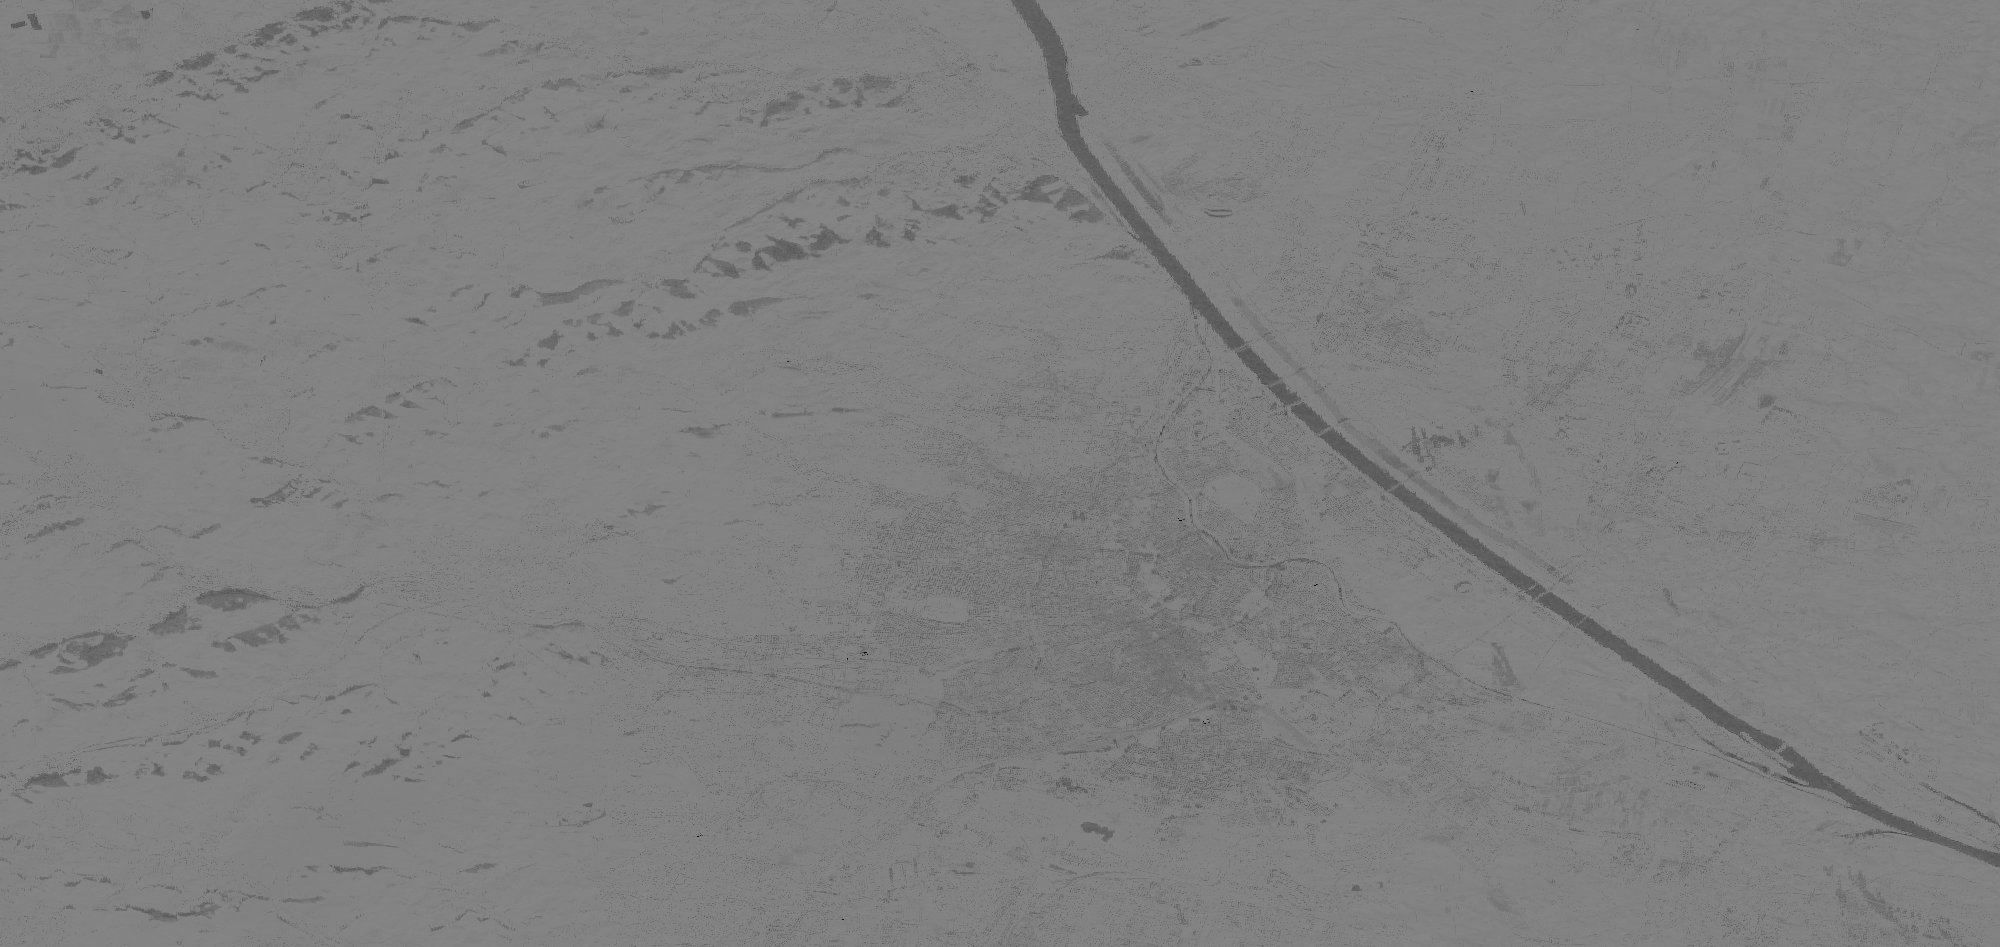

In [15]:
# Showing the result
from IPython.display import Image
result = Image(filename=OUTPUT_FILE)

result